In [53]:
#@ IMPORTING LIBRARIES AND DEPENDENCIES:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## 1. Load the data

In [28]:
#@ dataset
df = pd.read_csv("C:/Users/yadwi/OneDrive/DataScience/MLZoomcamp/2022 Cohort/Mid term project/cirrhosis.csv")
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [29]:
#@ Make data consistent by making columns names in lower cases and removing spaces
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,id,n_days,status,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [30]:
#df.iloc[47].to_dict()

In [31]:
#@ checking data types of each variable in the dataframe
df.dtypes

id                 int64
n_days             int64
status            object
drug              object
age                int64
sex               object
ascites           object
hepatomegaly      object
spiders           object
edema             object
bilirubin        float64
cholesterol      float64
albumin          float64
copper           float64
alk_phos         float64
sgot             float64
tryglicerides    float64
platelets        float64
prothrombin      float64
stage            float64
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             418 non-null    int64  
 1   n_days         418 non-null    int64  
 2   status         418 non-null    object 
 3   drug           312 non-null    object 
 4   age            418 non-null    int64  
 5   sex            418 non-null    object 
 6   ascites        312 non-null    object 
 7   hepatomegaly   312 non-null    object 
 8   spiders        312 non-null    object 
 9   edema          418 non-null    object 
 10  bilirubin      418 non-null    float64
 11  cholesterol    284 non-null    float64
 12  albumin        418 non-null    float64
 13  copper         310 non-null    float64
 14  alk_phos       312 non-null    float64
 15  sgot           312 non-null    float64
 16  tryglicerides  282 non-null    float64
 17  platelets      407 non-null    float64
 18  prothrombi

## 1.2 Explore the data

In [33]:
#@ Explore each columns of the dataset
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) # checking all unique values
    print(df[col].nunique()) # checking number of unique values
    print()

id
[1 2 3 4 5]
418

n_days
[ 400 4500 1012 1925 1504]
399

status
['D' 'C' 'CL']
3

drug
['D-penicillamine' 'Placebo' nan]
2

age
[21464 20617 25594 19994 13918]
344

sex
['F' 'M']
2

ascites
['Y' 'N' nan]
2

hepatomegaly
['Y' 'N' nan]
2

spiders
['Y' 'N' nan]
2

edema
['Y' 'N' 'S']
3

bilirubin
[14.5  1.1  1.4  1.8  3.4]
98

cholesterol
[261. 302. 176. 244. 279.]
201

albumin
[2.6  4.14 3.48 2.54 3.53]
154

copper
[156.  54. 210.  64. 143.]
158

alk_phos
[1718.  7394.8  516.  6121.8  671. ]
295

sgot
[137.95 113.52  96.1   60.63 113.15]
179

tryglicerides
[172.  88.  55.  92.  72.]
146

platelets
[190. 221. 151. 183. 136.]
243

prothrombin
[12.2 10.6 12.  10.3 10.9]
48

stage
[ 4.  3.  2.  1. nan]
4



#### Stage is the target variable

In [34]:
#@ select all features with numerical and categorical data types seperately:
numerical = ['n_days','bilirubin','cholesterol','albumin','copper','alk_phos','sgot','tryglicerides','platelets','prothrombin']     
categorical = ['status', 'drug', 'sex', 'ascites', 'hepatomegaly', 'spiders','edema']

# EDA

#### Check for missing values

In [35]:
#@ check missing values
df.isnull().sum()

id                 0
n_days             0
status             0
drug             106
age                0
sex                0
ascites          106
hepatomegaly     106
spiders          106
edema              0
bilirubin          0
cholesterol      134
albumin            0
copper           108
alk_phos         106
sgot             106
tryglicerides    136
platelets         11
prothrombin        2
stage              6
dtype: int64

#### Imputing missing values with mean and mode

In [36]:
#@ work on missingness
# imputing missingness in numerical variables by mean

for n in numerical:
    df[n].fillna(df[n].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

id               0
n_days           0
age              0
bilirubin        0
cholesterol      0
albumin          0
copper           0
alk_phos         0
sgot             0
tryglicerides    0
platelets        0
prothrombin      0
stage            6
dtype: int64

In [37]:
# imputing missingness in categorical variables by mode
for c in categorical:
    df[c].fillna(df[c].mode().values[0], inplace=True)

df.select_dtypes(include=(['object'])).isna().sum()

status          0
drug            0
sex             0
ascites         0
hepatomegaly    0
spiders         0
edema           0
dtype: int64

#### Convert target variable into a binary variable

In [38]:
# Turning target variable into binary e.g., if Liver cirrhosis = 1 ,  No cirrhosis = 0
df.stage = np.where(df.stage == 4,1,0)
df.stage

0      1
1      0
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: stage, Length: 418, dtype: int32

In [39]:
df.stage.value_counts()

0    274
1    144
Name: stage, dtype: int64

In [40]:
 # correlation matrix for the numerical features of the dataset
 pcorr = df[numerical].corr()

<AxesSubplot:>

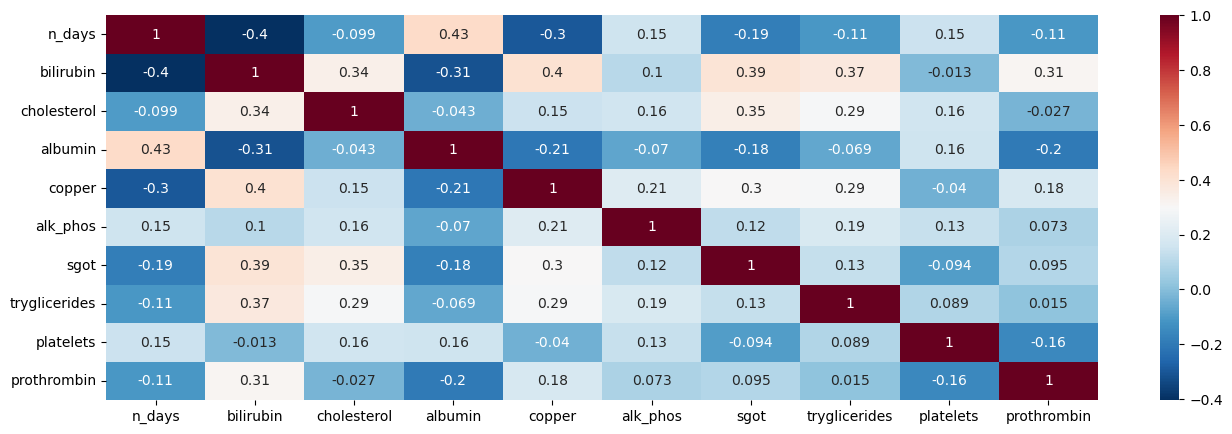

In [41]:
plt.figure(figsize = (16,5))
sns.heatmap(pcorr, 
            xticklabels=pcorr.columns,
            yticklabels=pcorr.columns,
            cmap='RdBu_r',
            annot=True)

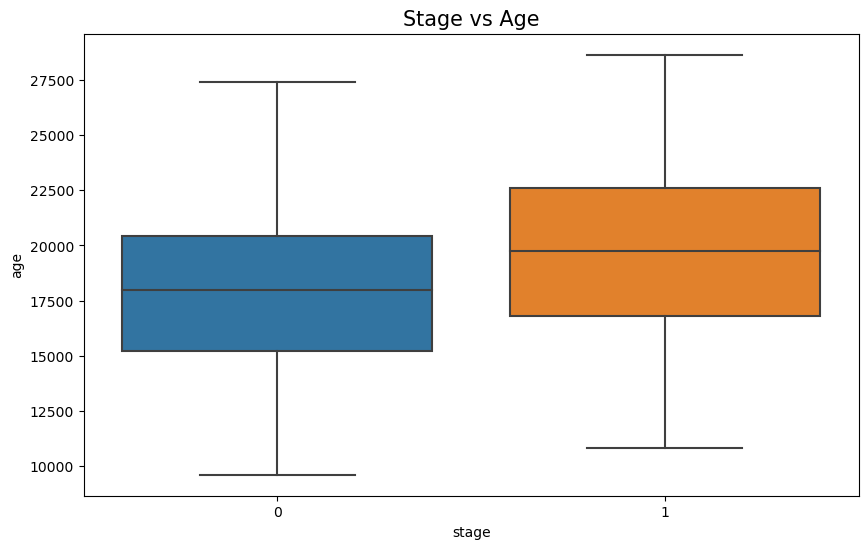

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["stage"], y=df["age"])
plt.title("Stage vs Age", size=15)
plt.show()

## Convert age into years

In [43]:
df["age"] = (df["age"]/365)
df["age"] = df["age"].astype("int64")

Text(0.5, 1.0, 'Age')

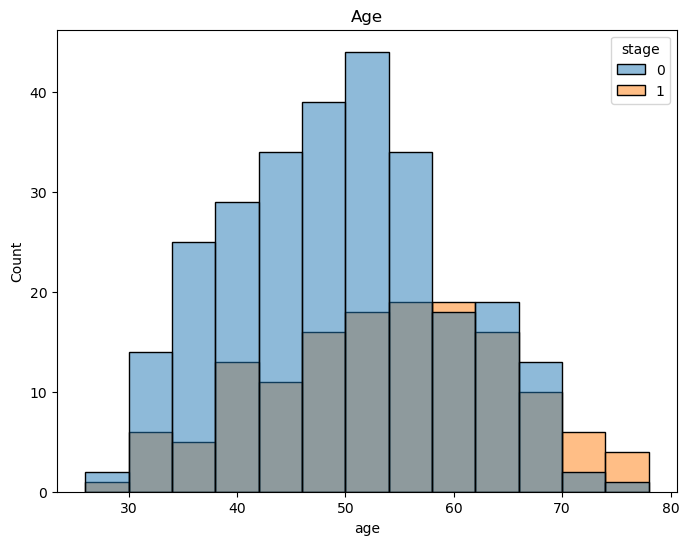

In [44]:
plt.figure(figsize=(8,6))
sns.histplot(x = "age", data = df, hue = "stage")
plt.title("Age",fontsize=12)

Text(0.5, 1.0, 'Drug')

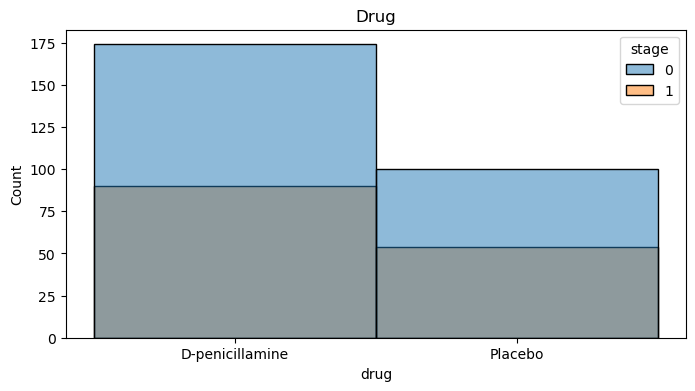

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(x = "drug", data = df, hue = "stage")
plt.title("Drug",fontsize=12)

In [46]:
df.describe()

,id,n_days,age,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,50.382775,3.220813,350.272727,3.497440,91.279904,1799.144976,120.564067,119.267943,256.866029,10.731100,0.344498
std,120.810458,1104.672992,10.481084,4.407506,193.123893,0.424972,74.485481,1875.121982,49.085094,54.050691,97.024861,1.019587,0.475774
min,1.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,0.000000
25%,105.250000,1092.750000,42.000000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,0.000000
50%,209.500000,1730.000000,51.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,0.000000
75%,313.750000,2613.500000,58.000000,3.400000,347.750000,3.770000,100.750000,1707.750000,135.750000,127.750000,315.500000,11.100000,1.000000
max,418.000000,4795.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,1.000000


## 1.4 Setting up the validation framework
#### performing train/test/val split

In [47]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.status == 'stage').astype('int').values
y_test = (df_test.status == 'stage').astype('int').values

del df_train['stage']
del df_test['stage']

In [48]:
from sklearn.model_selection import train_test_split
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Reset all Index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
len(df_train), len(df_val), len(df_test)

(250, 84, 84)

In [49]:
y_train = df_train.stage.values
y_val = df_val.stage.values
y_test = df_test.stage.values

df_train_feat = df_train

del df_train['stage']
del df_val['stage']
del df_test['stage']

## 1.5 Feature Importance Analysis
### Mutual info score

In [ ]:
def calculate_mi(series):
    return mutual_info_score(series, df_full_train.stage)

df_mi = df_full_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi.head())
display(df_mi.tail())

* The mutual info score shows hepatomegaly, status, ascites, & Edema are some important features. Ascites is the main complication of cirrhosis. Thus, is relevant to to the stage of the liver cirrhosis. 

* Hepatomegaly is the condition of larger liver than normal. This is a critical indication of diseased liver. 

* Cirrhosis slows the normal flow of blood through the liver, thus increasing pressure in the vein that brings blood to the liver from the intestines and spleen. Swelling in the legs and abdomen. The increased pressure in the portal vein can cause fluid to accumulate in the legs (edema) and in the abdomen (ascites).

* Therefore, increased edema and ascites presence is indicator of presence of liver cirrhosis.

In [50]:
df_full_train[numerical].corrwith(df_full_train.stage).abs()

n_days           0.333034
bilirubin        0.171395
cholesterol      0.076826
albumin          0.321201
copper           0.186659
alk_phos         0.024193
sgot             0.092324
tryglicerides    0.015769
platelets        0.265305
prothrombin      0.340636
dtype: float64

#### One-hot encoding

In [51]:
# One-hot encoding
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

## 1.6 Training logistic regression model

In [54]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

#### Accuracy with logistic regression

In [55]:
accuracy = model.score(X_val, y_val)
accuracy

0.7142857142857143

## 1.7 Training decision tree classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [59]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.6428571428571429

## 1.7.1 Decision trees parameter tuning

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
# We will use  metric here and our aim would be to find the maximum AUC on applied on the validation set
depths = [1,2,3,4,5,6,7,8,9,10,11,12]

for depth in depths: # none means no restriction, this tree show grow as deep as possible
# we already know what happens when the tree keeps growing deeper
# but this none is for comparison

    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth,auc))

   1 -> 0.679
   2 -> 0.765
   3 -> 0.765
   4 -> 0.758
   5 -> 0.705
   6 -> 0.680
   7 -> 0.674
   8 -> 0.625
   9 -> 0.643
  10 -> 0.696
  11 -> 0.643
  12 -> 0.661


In [62]:
scores =[]
for d in[2,3,4]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt= DecisionTreeClassifier(max_depth=d,min_samples_leaf = s)
        dt.fit(X_train,y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        #print('(%4s , %3d) -> %.3f' % (d,s,auc))
        scores.append((d,s,auc))

In [63]:
# put this in df for easy visualisation
columns = ['max_depth','min_samples_leaf','auc']
df_scores =pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,2,1,0.765306
1,2,2,0.765306
2,2,5,0.788265
3,2,10,0.788265
4,2,15,0.788265


In [64]:
# sorting auc values
df_scores.sort_values(by='auc',ascending=False)

,max_depth,min_samples_leaf,auc
13,3,15,0.798469
12,3,10,0.798469
14,3,20,0.794005
23,4,20,0.791454
2,2,5,0.788265
3,2,10,0.788265
4,2,15,0.788265
5,2,20,0.788265
11,3,5,0.779656
1,2,2,0.765306


In [65]:
# Pivot
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                 columns=['max_depth'], values =['auc'])
df_scores_pivot.round(3)

auc              
max_depth             2      3      4
min_samples_leaf                     
1                 0.765  0.765  0.758
2                 0.765  0.765  0.763
5                 0.788  0.780  0.734
10                0.788  0.798  0.726
15                0.788  0.798  0.755
20                0.788  0.794  0.791
100               0.741  0.741  0.741
200               0.500  0.500  0.500
500               0.500  0.500  0.500

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

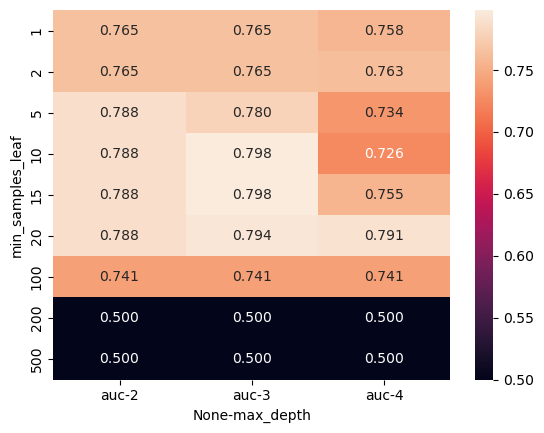

In [66]:
# visualize it using heatmap
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [67]:
# the best max_depth values are somewhere in between 2 & 4
# try each of these values, try different min_samples_leaf values

scores =[]
for d in[2,3,4,5,6,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt= DecisionTreeClassifier(max_depth=d,min_samples_leaf = s)
        dt.fit(X_train,y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        #print('(%4s , %3d) -> %.3f' % (d,s,auc))
        scores.append((d,s,auc))

In [68]:
columns = ['max_depth','min_samples_leaf','auc']
df_scores =pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,2.0,1,0.765306
1,2.0,2,0.765306
2,2.0,5,0.788265
3,2.0,10,0.788265
4,2.0,15,0.788265


In [69]:
# sorting auc values
df_scores.sort_values(by='auc',ascending=False)

,max_depth,min_samples_leaf,auc
12,3.0,10,0.798469
13,3.0,15,0.798469
14,3.0,20,0.794005
68,20.0,20,0.791454
41,6.0,20,0.791454
...,...,...,...
44,6.0,500,0.500000
43,6.0,200,0.500000
35,5.0,500,0.500000
34,5.0,200,0.500000


In [70]:
# Pivot
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                 columns=['max_depth'], values =['auc'])
df_scores_pivot.round(3)

auc                                                   \
max_depth           NaN   2.0    3.0    4.0    5.0    6.0    10.0   15.0   
min_samples_leaf                                                           
1                 0.661  0.765  0.765  0.758  0.705  0.670  0.670  0.625   
2                 0.607  0.765  0.765  0.763  0.639  0.664  0.626  0.615   
5                 0.686  0.788  0.780  0.720  0.708  0.726  0.705  0.702   
10                0.688  0.788  0.798  0.739  0.704  0.704  0.704  0.704   
15                0.755  0.788  0.798  0.742  0.742  0.755  0.742  0.755   
20                0.791  0.788  0.794  0.791  0.791  0.791  0.791  0.791   
100               0.741  0.741  0.741  0.741  0.741  0.741  0.741  0.741   
200               0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500   
500               0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500   

                         
max_depth          20.0  
min_samples_leaf         
1                 0.643  
2                 0.630  
5                 0.695  
10                0.704  
15                0.755  
20                0.791  
100               0.741  
200               0.500  
500               0.500

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

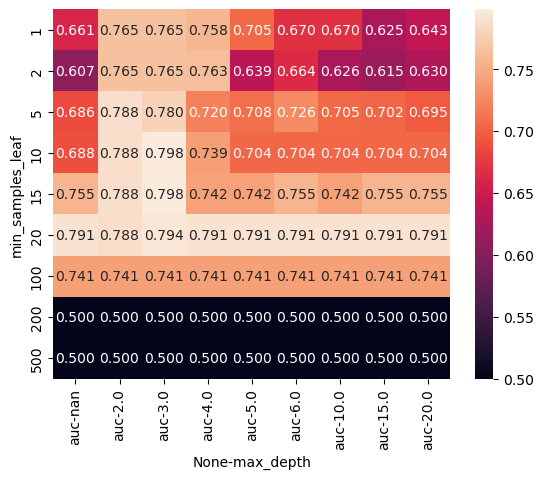

In [71]:
# visualize it using heatmap
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [72]:
#### Final decision tree
# final decision tree
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 15, random_state = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, random_state=1)

In [73]:
#### Decision tree final model on validation set
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7420280612244898

## 1.8 Training random forest classifier

In [74]:
# train the model
rf = RandomForestClassifier (n_estimators=10, random_state = 1) # here number of estimator is number of models we want to train
rf.fit(X_train,y_train)

# use trained model for prediction
y_pred = rf.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred) # this is already pretty good without tuning

0.8268494897959183

## 1.8.1 Tuning the random forest classifier

In [75]:
# checking first row of validation set to see the probability
rf.predict_proba(X_val[[0]])

array([[0.5, 0.5]])

In [76]:
# increase the n_estimators or number of trees 
# iterate over many different values
scores =[]

for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators = n, random_state = 1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n,auc))

In [77]:
# check the scores in df
df_scores = pd.DataFrame(scores, columns=['n_estimators','auc'])
df_scores

,n_estimators,auc
0,10,0.826849
1,20,0.823980
2,30,0.803890
3,40,0.797832
4,50,0.808992
5,60,0.805804
6,70,0.804528
7,80,0.800702
8,90,0.806122
9,100,0.809311


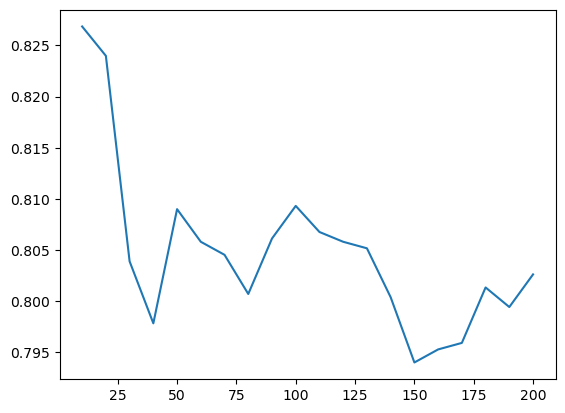

In [78]:
#plot
plt.plot(df_scores.n_estimators, df_scores.auc)

In [79]:
scores = []

for d in [5,10,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d,n,auc))

In [80]:
columns = ['max_depth','n_estimators','auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.796556
1,5,20,0.812500
2,5,30,0.834184
3,5,40,0.826531
4,5,50,0.827806


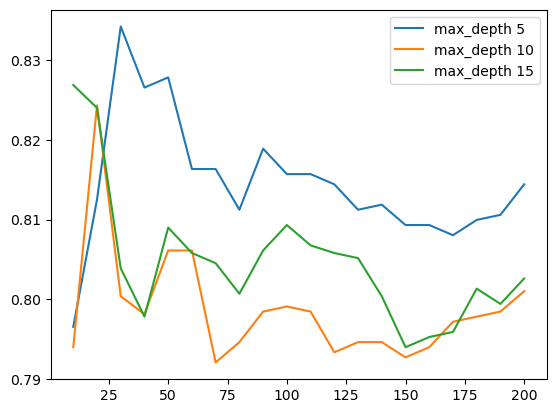

In [81]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label="max_depth %d" %d)
plt.legend()

In [82]:
max_depth = 15
scores = []

for s in [1,3,5,10,50]:
    for n in range (10,201,10):
        rf = RandomForestClassifier (n_estimators=n,
                                    max_depth= max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train,y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s,n,auc))

In [83]:
columns = ['min_samples_leaf','n_estimators','auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.826849
1,1,20,0.823980
2,1,30,0.803890
3,1,40,0.797832
4,1,50,0.808992


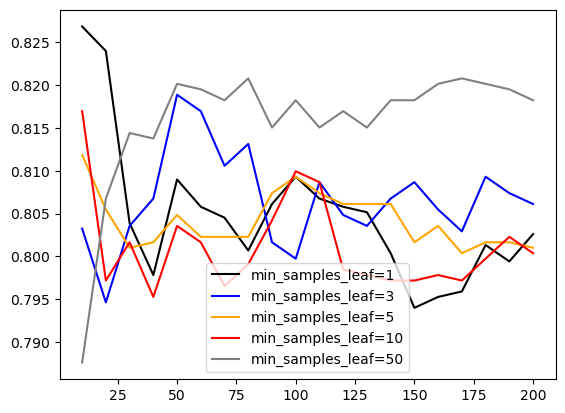

In [84]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()  

In [85]:
rf = RandomForestClassifier(n_estimators=50,
                            max_depth=15,
                            min_samples_leaf=50,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=50,
                       random_state=1)

In [86]:
# use trained model for prediction
y_pred = rf.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred) #

0.8201530612244897

## 1.9 Final model

* Based on the best AUC, I will select the random forest model (rf) and will train this model on train and validation sets

In [87]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.stage.values

del df_full_train['stage']

In [88]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

# we have y_test, we only need feature matrix here
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [89]:
model_rf = RandomForestClassifier(n_estimators=50,max_depth=15,min_samples_leaf=50,random_state=1)

In [90]:
model_rf.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.7681071211199026

## 1.10 Save the model for deployment

In [91]:
import pickle

In [92]:
model_output_file = f'model_rf.bin'

with open(model_output_file,'wb') as f_out:
     pickle.dump((dv,model_rf),f_out)

#### loading the saved model

In [93]:
import pickle

In [94]:
model_file = 'model_rf.bin'

In [95]:
with open(model_file,'rb') as f_in:
    dv,model = pickle.load(f_in)

In [96]:
dv,model

(DictVectorizer(sparse=False),
 RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=50,
                        random_state=1))

In [97]:
patient = {
 'n_days': 4427,
 'status': 'C',
 'drug': 'Placebo',
 'age': 17947,
 'sex': 'M',
 'ascites': 'Y',
 'hepatomegaly': 'Y',
 'spiders': 'Y',
 'edema': 'Y',
 'bilirubin': 1.9,
 'cholesterol': 500.0,
 'albumin': 3.7,
 'copper': 281.0,
 'alk_phos': 10396.8,
 'sgot': 188.34,
 'tryglicerides': 178.0,
 'platelets': 500.0,
 'prothrombin': 11.0
}

In [98]:
X = dv.transform([patient])

In [99]:
model.predict_proba(X)[0,1]
# in this 2-D array, the second dimension is of interest

0.3976936738625728